## Problem 1 

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Data Dictionary:

1. vote: Party choice: Conservative or Labour
2. age: in years
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.
5. Blair: Assessment of the Labour leader, 1 to 5.
6. Hague: Assessment of the Conservative leader, 1 to 5.
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
9. gender: female or male.

### Data Ingestion: 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. 

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
# For preprocessing the data
from sklearn import preprocessing
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
xls = pd.ExcelFile('Election_Data.xlsx')

In [3]:
xls.sheet_names

['Sheet1', 'Election_Dataset_Two Classes']

In [4]:
df = pd.read_excel(xls, sheet_name="Election_Dataset_Two Classes")

In [5]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
df=df.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [9]:
df.shape

(1525, 9)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [11]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [12]:
# Are there any duplicates?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


In [13]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (1525, 9)
After (1517, 9)


In [14]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [15]:
df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [16]:
df.gender.value_counts()

female    808
male      709
Name: gender, dtype: int64

In [17]:
df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

### Univariate Analysis

Text(0.5, 1.0, 'Blair Boxplot')

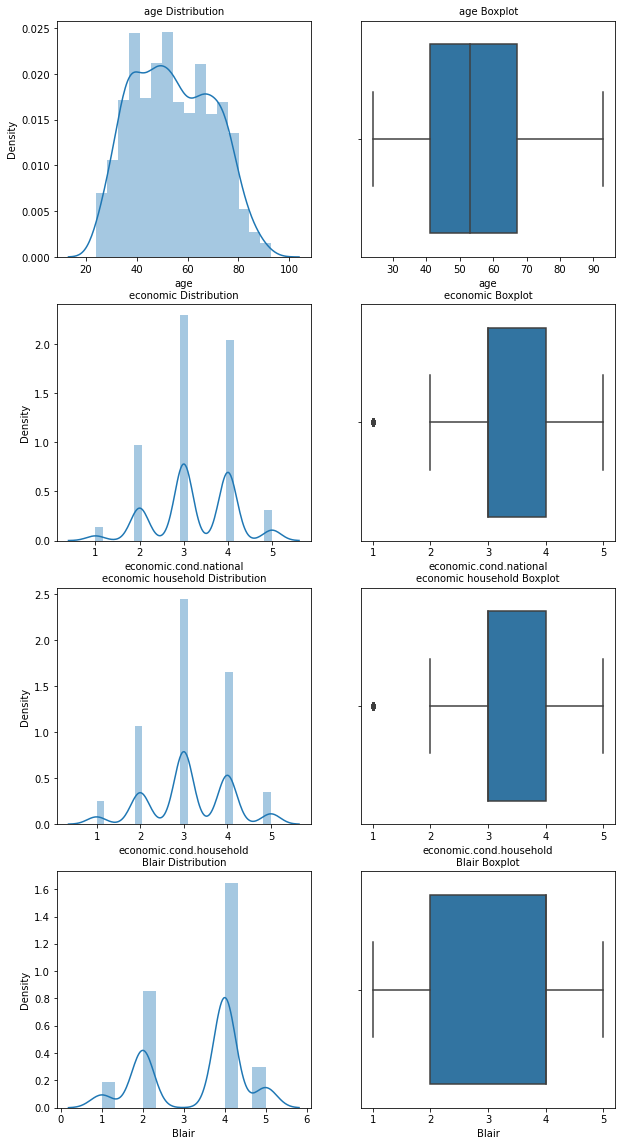

In [18]:
fig,axes=plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a=sns.distplot(df['age'] ,ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a=sns.boxplot(df['age'] ,orient="v",ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a=sns.distplot(df['economic.cond.national'] ,ax=axes[1][0])
a.set_title("economic Distribution",fontsize=10)

a=sns.boxplot(df['economic.cond.national'] ,orient="v",ax=axes[1][1])
a.set_title("economic Boxplot",fontsize=10)

a=sns.distplot(df['economic.cond.household'] ,ax=axes[2][0])
a.set_title("economic household Distribution",fontsize=10)

a=sns.boxplot(df['economic.cond.household'] ,orient="v",ax=axes[2][1])
a.set_title("economic household Boxplot",fontsize=10)

a=sns.distplot(df['Blair'] ,ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a=sns.boxplot(df['Blair'] ,orient="v",ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

Text(0.5, 1.0, 'political knowledge Boxplot')

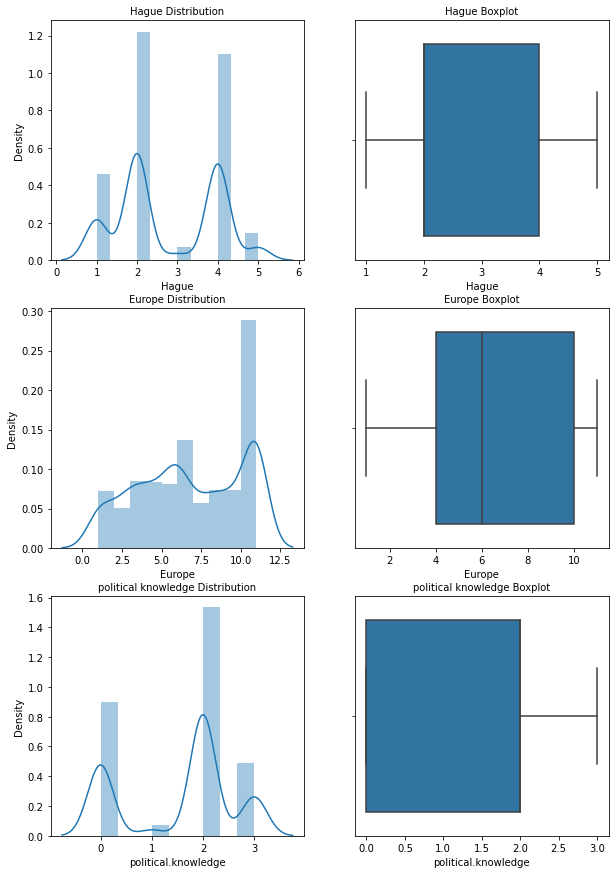

In [19]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,15)
a=sns.distplot(df['Hague'] ,ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a=sns.boxplot(df['Hague'] ,orient="v",ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a=sns.distplot(df['Europe'] ,ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a=sns.boxplot(df['Europe'] ,orient="v",ax=axes[1][1])
a.set_title("Europe Boxplot",fontsize=10)

a=sns.distplot(df['political.knowledge'] ,ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=10)

a=sns.boxplot(df['political.knowledge'] ,orient="v",ax=axes[2][1])
a.set_title("political knowledge Boxplot",fontsize=10)

<AxesSubplot:xlabel='vote', ylabel='count'>

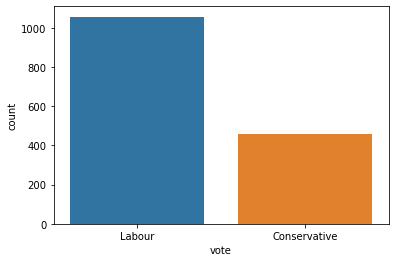

In [20]:
sns.countplot(data= df, x='vote')

<AxesSubplot:xlabel='gender', ylabel='count'>

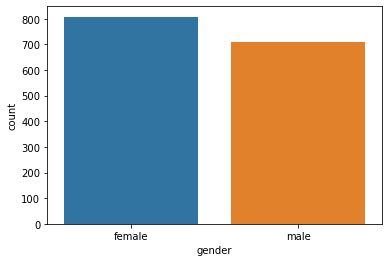

In [21]:
sns.countplot(data= df, x='gender')

### Bivariate Analysis

<AxesSubplot:xlabel='economic.cond.national', ylabel='count'>

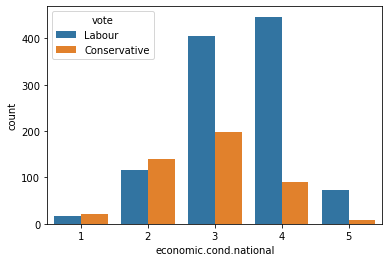

In [22]:
sns.countplot(data=df, x='economic.cond.national', hue='vote') 

<AxesSubplot:xlabel='economic.cond.national', ylabel='count'>

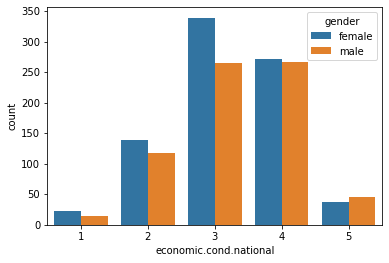

In [23]:
sns.countplot(data=df, x='economic.cond.national', hue='gender') 

<AxesSubplot:xlabel='economic.cond.household', ylabel='count'>

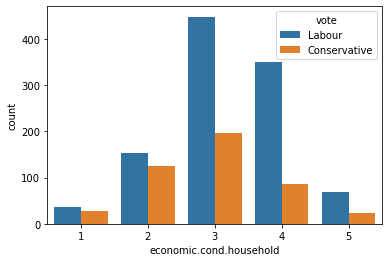

In [24]:
sns.countplot(data=df, x='economic.cond.household', hue='vote') 

<AxesSubplot:xlabel='economic.cond.household', ylabel='count'>

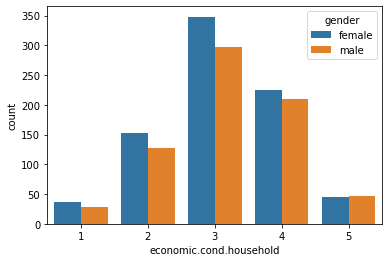

In [25]:
sns.countplot(data=df, x='economic.cond.household', hue='gender') 

<AxesSubplot:xlabel='Blair', ylabel='count'>

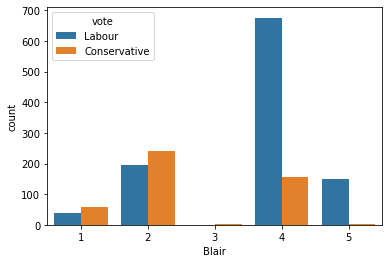

In [26]:
sns.countplot(data=df, x='Blair', hue='vote') 

<AxesSubplot:xlabel='Blair', ylabel='count'>

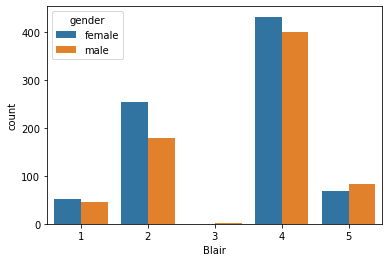

In [27]:
sns.countplot(data=df, x='Blair', hue='gender') 

<AxesSubplot:xlabel='Hague', ylabel='count'>

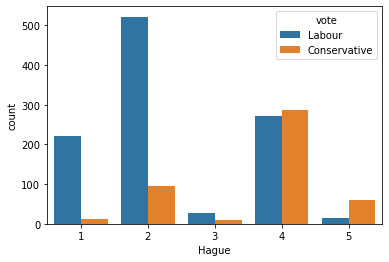

In [28]:
sns.countplot(data=df, x='Hague', hue='vote') 

<AxesSubplot:xlabel='Hague', ylabel='count'>

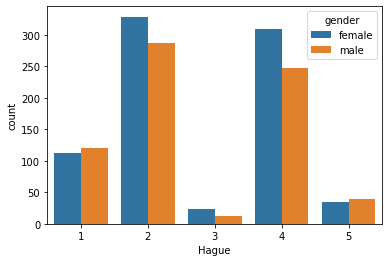

In [29]:
sns.countplot(data=df, x='Hague', hue='gender') 

<AxesSubplot:xlabel='Europe', ylabel='count'>

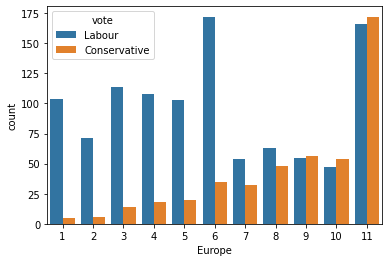

In [30]:
sns.countplot(data=df, x='Europe', hue='vote') 

<AxesSubplot:xlabel='Europe', ylabel='count'>

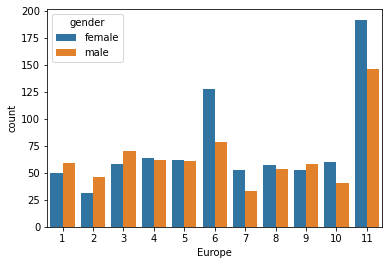

In [31]:
sns.countplot(data=df, x='Europe', hue='gender') 

<AxesSubplot:xlabel='political.knowledge', ylabel='count'>

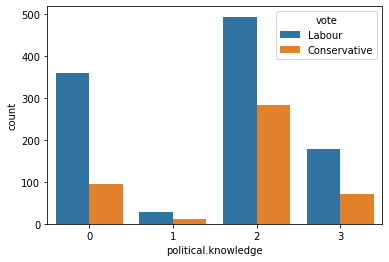

In [32]:
sns.countplot(data=df, x='political.knowledge', hue='vote') 

<AxesSubplot:xlabel='political.knowledge', ylabel='count'>

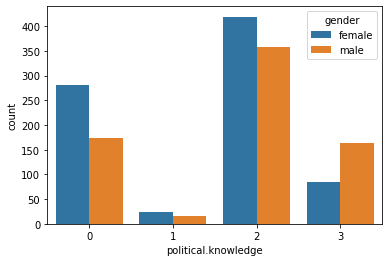

In [33]:
sns.countplot(data=df, x='political.knowledge', hue='gender') 

### Multivariate Analysis

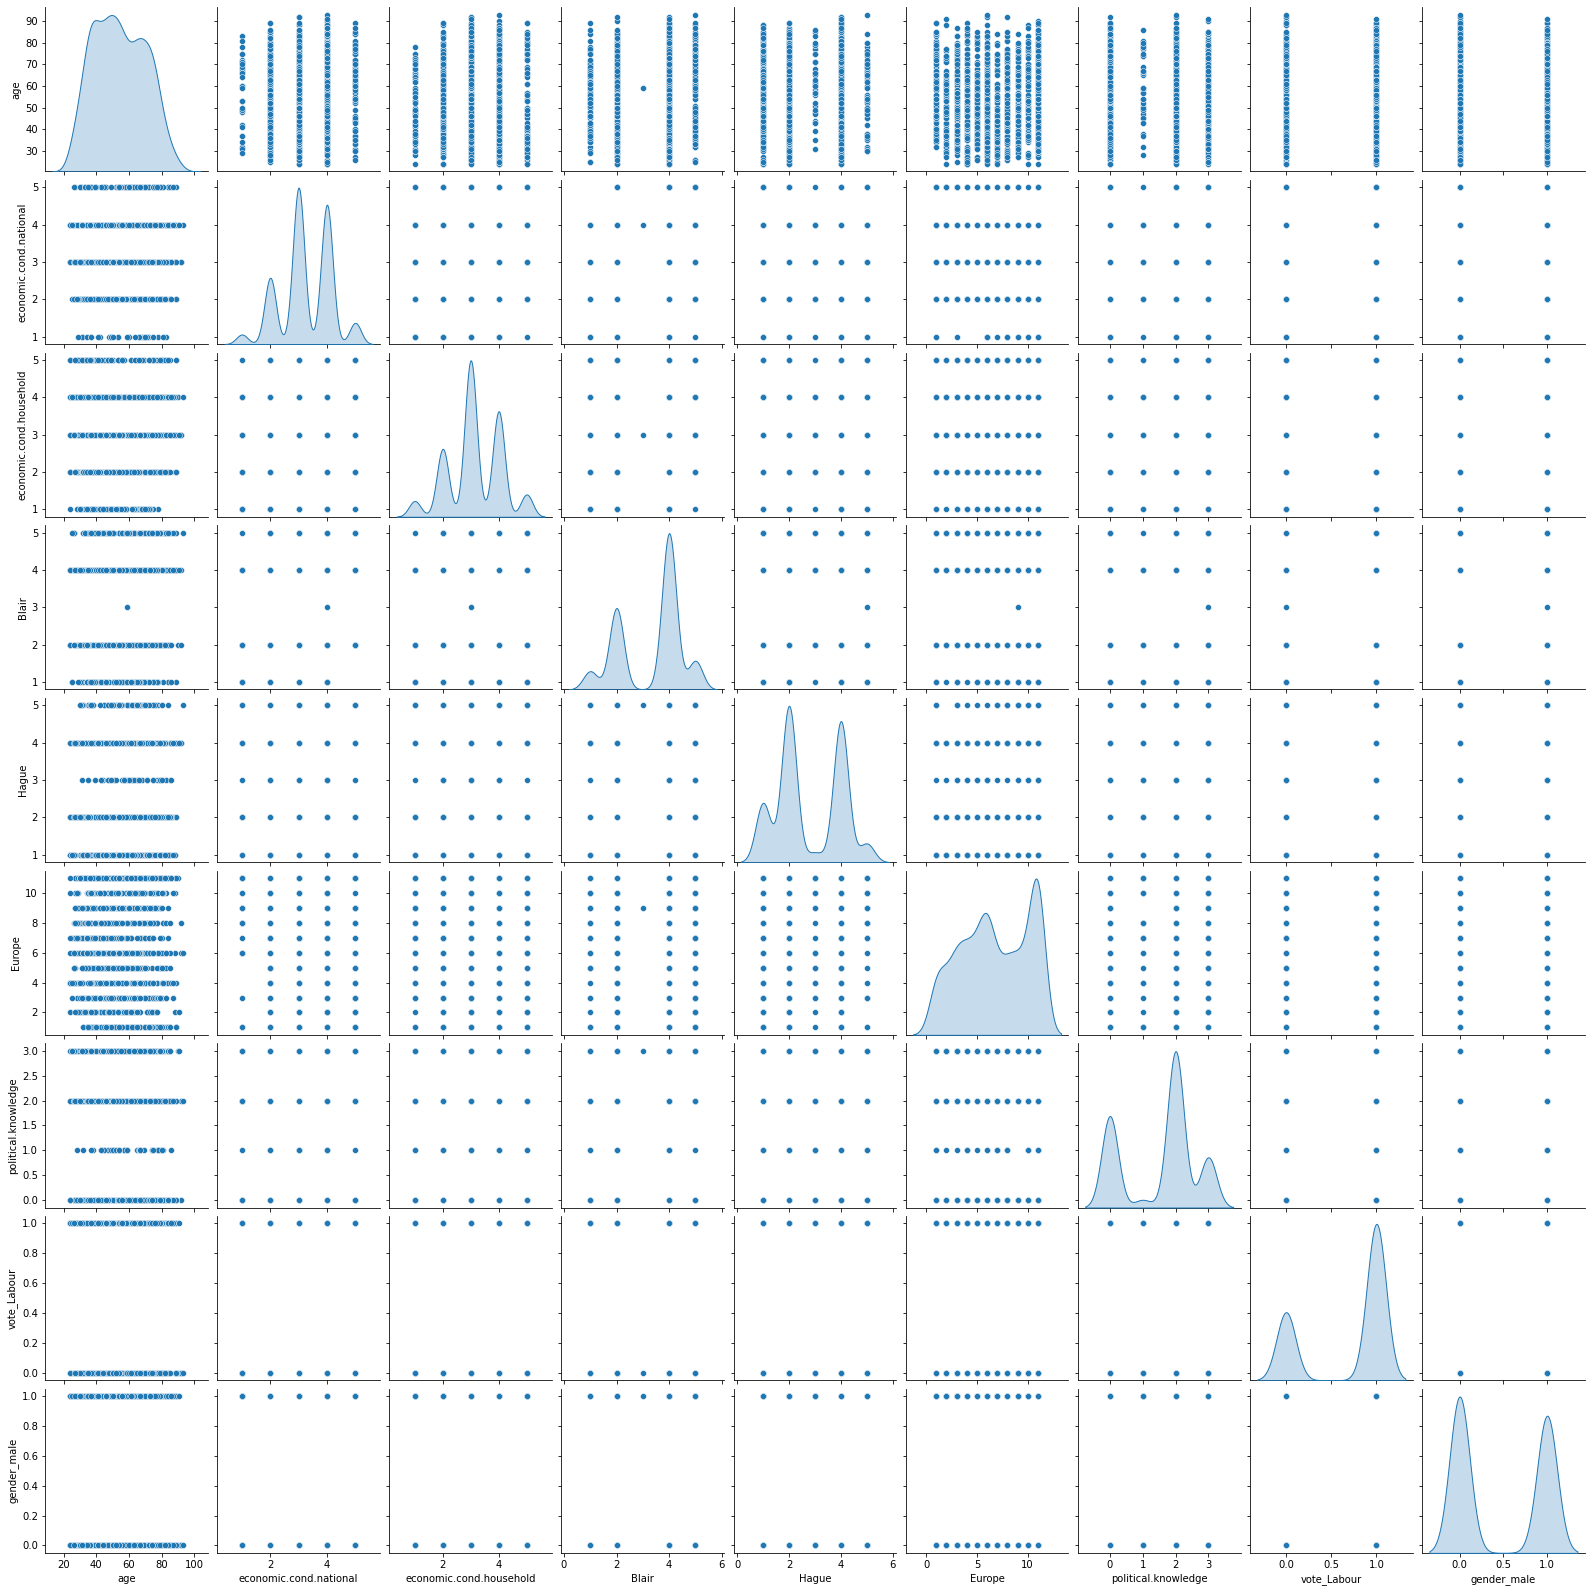

In [39]:
sns.pairplot(df, diag_kind='kde')

In [35]:
df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


<AxesSubplot:>

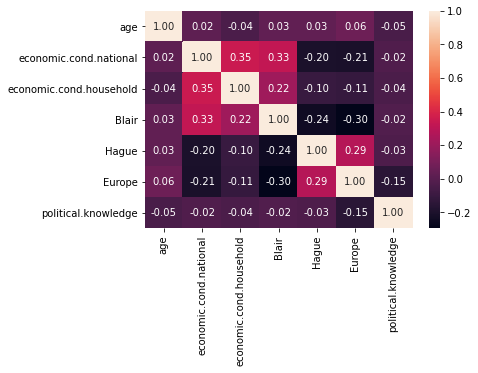

In [36]:
sns.heatmap(df.corr(), fmt='.2f', annot=True)

### Data Preparation: 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [37]:
df=pd.get_dummies(df, columns=['vote', 'gender'], drop_first=True)

In [38]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


#### Scaling
We are not going to scale the data for Logistic regression, LDA and Naive Baye’s models as it is not necessary.
But in case of KNN it is necessary to scale the data, as it a distance-based algorithm (typically based on Euclidean distance). Scaling the data gives similar weightage to all the variables.

### Train-Test split

In [40]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote_Labour', axis=1)

# Copy target into the y dataframe. 
y = df[['vote_Labour']]

In [41]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [42]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [43]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

#### Logistic Regression

In [44]:
LR_Model = LogisticRegression()

In [45]:
LR_Model.fit(X_train,y_train)

LogisticRegression()

In [46]:
## Performance Matrix on train data set
y_train_predict = LR_Model.predict(X_train)
model_score = LR_Model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8350612629594723
[[199 108]
 [ 67 687]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



AUC: 0.890


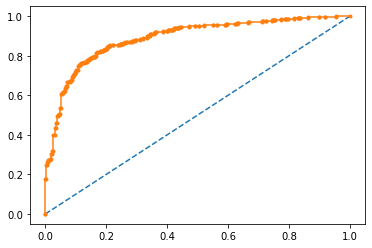

In [47]:
# predict probabilities
probs = LR_Model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [48]:
## Performance Matrix on test data set
y_test_predict = LR_Model.predict(X_test)
model_score = LR_Model.score(X_test, y_test)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[110  43]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.879


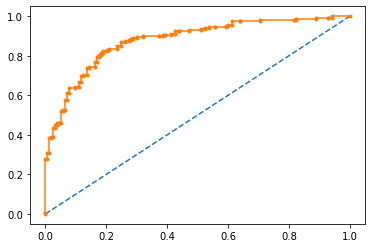

In [49]:
# predict probabilities
probs = LR_Model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Linear Discriminant Analysis

In [50]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train,y_train)

In [51]:
## Performance Matrix on train data set
y_train_predict = lda_model.predict(X_train)
model_score = lda_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



AUC: 0.889


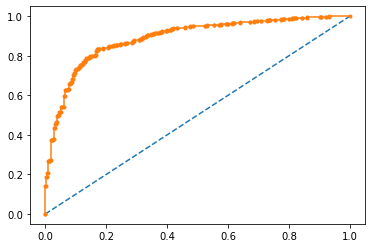

In [52]:
# predict probabilities
probs = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [53]:
## Performance Matrix on test data set
y_test_predict = lda_model.predict(X_test)
model_score = lda_model.score(X_test, y_test)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.888


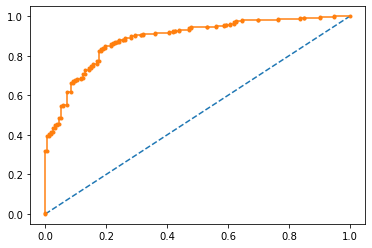

In [54]:
# predict probabilities
probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

#### Naive-Bayes Model

In [55]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

In [56]:
NB_model = GaussianNB()
# fit the model
NB_model.fit(X_train, y_train)

GaussianNB()

In [57]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



AUC: 0.888


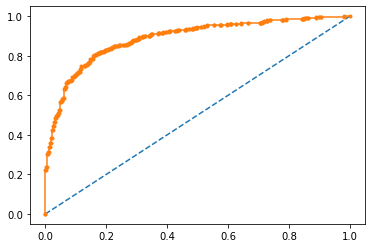

In [58]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [59]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.876


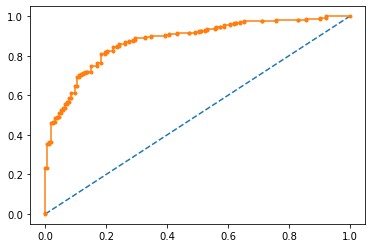

In [60]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### KNN Model

In [61]:
X1=X.copy()

In [62]:
X1[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']]=X1[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']].apply(zscore)

In [63]:
X1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,0
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,0
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30 , random_state=1)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
# fit the model
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8539114043355325
[[218  89]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.89      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



AUC: 0.928


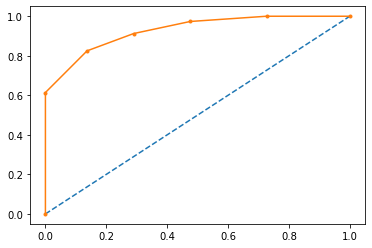

In [67]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [68]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[108  45]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.879


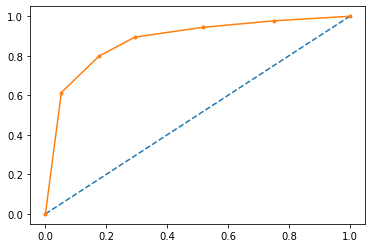

In [69]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

#### Bagging (Random Forest)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [71]:
cart=RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [72]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9679547596606974
[[278  29]
 [  5 749]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



AUC: 0.997


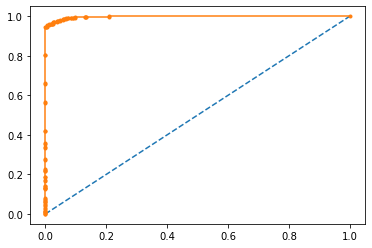

In [73]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the p

In [74]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.896


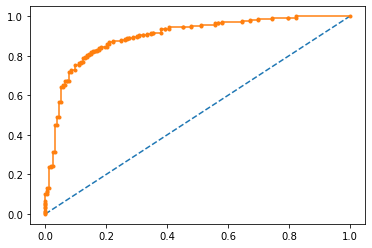

In [75]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Boosting  
#### Ada boosting

In [76]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [77]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



AUC: 0.915


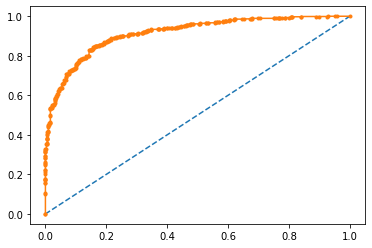

In [78]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [79]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



AUC: 0.877


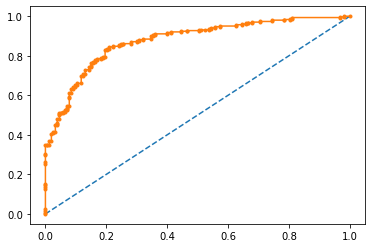

In [80]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Gradient boosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [82]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



AUC: 0.951


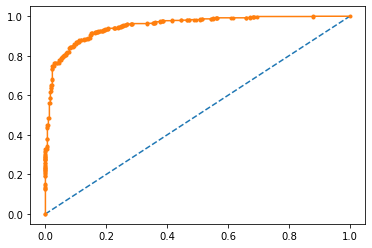

In [83]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [84]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



AUC: 0.899


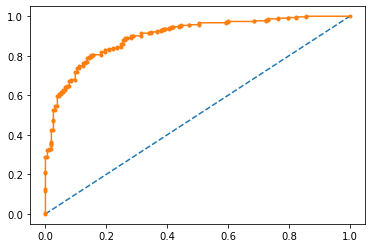

In [85]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

In [86]:
data = [[0.83,0.83,0.75,0.73,0.82,0.80,0.85,0.83,0.97,0.83,0.85,0.81,0.89,0.83],[0.86,0.87,0.75,0.72,0.90,0.88,0.89,0.86,0.96,0.85,0.88,0.84,0.91,0.85],[0.91,0.88,0.98,0.98,0.84,0.81,0.91,0.89,0.99,0.90,0.91,0.88,0.94,0.91],[0.89,0.88,0.88,0.86,0.88,0.86,0.98,0.86,0.997,0.90,0.92,0.88,0.95,0.90],[0.88,0.88,0.85,0.83,0.87,0.84,0.90,0.88,0.98,0.88,0.90,0.86,0.93,0.88]]

In [87]:
cf = pd.DataFrame(data, columns = ['LR Train','LR Test','Lda Train','Lda Test','NB Train','NB Test','KNN Train','KNN Test','Bagging Train','Bagging Test','AB Train','AB Test','Gradient Train','Gradient Test'], index=['accuracy','precision','recall','auc_roc_score','f1score',])
cf 

,LR Train,LR Test,Lda Train,Lda Test,NB Train,NB Test,KNN Train,KNN Test,Bagging Train,Bagging Test,AB Train,AB Test,Gradient Train,Gradient Test
accuracy,0.83,0.83,0.75,0.73,0.82,0.80,0.85,0.83,0.970,0.83,0.85,0.81,0.89,0.83
precision,0.86,0.87,0.75,0.72,0.90,0.88,0.89,0.86,0.960,0.85,0.88,0.84,0.91,0.85
recall,0.91,0.88,0.98,0.98,0.84,0.81,0.91,0.89,0.990,0.90,0.91,0.88,0.94,0.91
auc_roc_score,0.89,0.88,0.88,0.86,0.88,0.86,0.98,0.86,0.997,0.90,0.92,0.88,0.95,0.90
f1score,0.88,0.88,0.85,0.83,0.87,0.84,0.90,0.88,0.980,0.88,0.90,0.86,0.93,0.88


### Problem 2

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1. President Franklin D. Roosevelt in 1941
2. President John F. Kennedy in 1961
3. President Richard Nixon in 1973

### 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [87]:
!pip install wordcloud
import nltk
import random
import re

nltk.download('stopwords')
nltk.download('punkt')

nltk.download('inaugural')

from nltk.corpus import inaugural

inaugural.fileids()

Roosevelt = inaugural.raw('1941-Roosevelt.txt')

Kennedy = inaugural.raw('1961-Kennedy.txt')

Nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading inaugural: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [88]:
inaugural.words(inaugural.fileids()[0])

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]

In [89]:
nltk.FreqDist(inaugural.words()).most_common(10)

[('the', 9555),
 (',', 7275),
 ('of', 7169),
 ('and', 5226),
 ('.', 5011),
 ('to', 4477),
 ('in', 2604),
 ('a', 2229),
 ('our', 2062),
 ('that', 1769)]

### Number of Characters

In [90]:
#get the length of data

#number of characters in Roosevelt
print('Number of characters in Roosevelt file:', len(Roosevelt))

#number of characters in Kennedy
print('Number of characters in Kennedy file:', len(Kennedy))

#number of characters in Nixon
print('Number of characters in Nixon file:', len(Nixon))

Number of characters in Roosevelt file: 7571
Number of characters in Kennedy file: 7618
Number of characters in Nixon file: 9991


### Number of Words

In [91]:
#number of words in Roosevelt

print('Number of words in Roosevelt file:', len(inaugural.words('1941-Roosevelt.txt')))

#number of words in Kennedy

print('Number of words in Kennedy file:', len(inaugural.words('1961-Kennedy.txt')))

#number of words in Nixon

print('Number of words in Nixon file:', len(inaugural.words('1973-Nixon.txt')))

Number of words in Roosevelt file: 1536
Number of words in Kennedy file: 1546
Number of words in Nixon file: 2028


### Number of Sentences

In [130]:
#number of sentences in Roosevelt 

print('Number of sentences in Roosevelt file:',len(inaugural.sents('1941-Roosevelt.txt')))

#number of sentences in Kennedy

print('Number of sentences in Kennedy file:', len(inaugural.sents('1961-Kennedy.txt')))

#number of sentences in Nixon

print('Number of sentences in Nixon file:', len(inaugural.sents('1973-Nixon.txt')))

Number of sentences in Roosevelt file: 68
Number of sentences in Kennedy file: 52
Number of sentences in Nixon file: 69


In [93]:
speech = list([Roosevelt, Kennedy, Nixon])
speeches = pd.DataFrame(speech)

In [94]:
speeches_try = pd.DataFrame({'Roosevelt': Roosevelt,'Kennedy': Kennedy,'Nixon': Nixon},index=['Speech'])
speeches_try

,Roosevelt,Kennedy,Nixon
Speech,On each national day of inauguration since 178...,"Vice President Johnson, Mr. Speaker, Mr. Chief...","Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


### 2.2 Remove all the stopwords from all three speeches

#### Stopwords

In [95]:
speeches_try['word_count_r']= speeches_try.Roosevelt.apply(lambda x: len(str(x).split()))
speeches_try['word_count_k']= speeches_try.Kennedy.apply(lambda x: len(str(x).split()))
speeches_try['word_count_n']= speeches_try.Nixon.apply(lambda x: len(str(x).split()))

In [96]:
speeches_try

,Roosevelt,Kennedy,Nixon,word_count_r,word_count_k,word_count_n
Speech,On each national day of inauguration since 178...,"Vice President Johnson, Mr. Speaker, Mr. Chief...","Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1360,1390,1819


#### Roosevelt speech

In [97]:
#Roosevelt speech before removing stopwords

speeches_try.iloc[0][0]

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [98]:
#Stopwords
from nltk.corpus import stopwords
import string

stop_1 = stopwords.words('english')+list(string.punctuation)

#Let us see what are the stopwords in general
stop_1

#When we see the speech text, we can see that -- are also included in the speech which has not been included in the stop words. So Let us add them to this list.

stop_1.append('--')

speeches_try['stopcount_r'] =speeches_try['Roosevelt'].apply(lambda x: len([x for x in x.split() if x in stop_1]))
speeches_try[['Roosevelt', 'word_count_r','stopcount_r']]

,Roosevelt,word_count_r,stopcount_r
Speech,On each national day of inauguration since 178...,1360,654


In [99]:
#let us see the stopwords in this speech

speeches_try['rastop'] = speeches_try['Roosevelt'].apply(lambda x: ([x for x in x.split() if x in stop_1 ]))
print(speeches_try['rastop'])

Speech    [each, of, the, have, their, of, to, the, the,...
Name: rastop, dtype: object


In [100]:
#Let us pre-process it much more with lower case letters

speeches_try['filter_r'] = speeches_try['Roosevelt'].apply(lambda x: " ".join(x.lower() for x in x.split()))
speeches_try['filter_r'] =speeches_try['filter_r'].str.replace('[^a-zA-Z\s]','')
speeches_try['filter_r'] =speeches_try['filter_r'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_1))

In [101]:
speeches_try.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Speech to Speech
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Roosevelt     1 non-null      object
 1   Kennedy       1 non-null      object
 2   Nixon         1 non-null      object
 3   word_count_r  1 non-null      int64 
 4   word_count_k  1 non-null      int64 
 5   word_count_n  1 non-null      int64 
 6   stopcount_r   1 non-null      int64 
 7   rastop        1 non-null      object
 8   filter_r      1 non-null      object
dtypes: int64(4), object(5)
memory usage: 80.0+ bytes


In [102]:
speeches_try.iloc[0][8]

'national day inauguration since people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding lifes ideals measured material things vi

In [103]:
#Let us perform stemming

from nltk.stem import PorterStemmer
stem_r = PorterStemmer()

speeches_try['filter_r'] = speeches_try['filter_r'].apply(lambda x: " ".join([stem_r.stem(x) for x in x.split()]))

In [104]:
speeches_try.iloc[0][8]

'nation day inaugur sinc peopl renew sens dedic unit state washington day task peopl creat weld togeth nation lincoln day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without us come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man threescor year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quickli boldli decis later year live year fruit year peopl democraci brought us greater secur hope better understand life ideal measur materi thing vital present futur experi democraci success surviv crisi home put away mani evil thing built new structur endur line maintain fact

#### Kennedy's speech

In [105]:
#kennedy's speech before removing stopwords

speeches_try.iloc[0][1]

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [106]:
stop_2 = stopwords.words('english')+list(string.punctuation)

#Let us see what are the stopwords in general
stop_2

#When we see the speech text, we can see that -- are also included in the speech which has not been included in the stop words. So Let us add them to this list.

stop_2.append('--')
stop_2.append('us')
stop_2.append('let')

speeches_try['stopcount_k'] =speeches_try['Kennedy'].apply(lambda x: len([x for x in x.split() if x in stop_2]))
speeches_try[['Kennedy', 'word_count_k','stopcount_k']]

,Kennedy,word_count_k,stopcount_k
Speech,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390,661


In [107]:
#let us see the stopwords in this speech

speeches_try['kestop'] = speeches_try['Kennedy'].apply(lambda x: ([x for x in x.split() if x in stop_2 ]))
print(speeches_try['kestop'])

Speech    [we, not, a, of, but, a, of, --, an, as, as, a...
Name: kestop, dtype: object


In [108]:
#Let us pre-process it much more with lower case letters

speeches_try['filter_k'] = speeches_try['Kennedy'].apply(lambda x: " ".join(x.lower() for x in x.split()))
speeches_try['filter_k'] =speeches_try['filter_k'].str.replace('[^a-zA-Z\s]','')
speeches_try['filter_k'] =speeches_try['filter_k'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_2))

In [109]:
speeches_try.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Speech to Speech
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Roosevelt     1 non-null      object
 1   Kennedy       1 non-null      object
 2   Nixon         1 non-null      object
 3   word_count_r  1 non-null      int64 
 4   word_count_k  1 non-null      int64 
 5   word_count_n  1 non-null      int64 
 6   stopcount_r   1 non-null      int64 
 7   rastop        1 non-null      object
 8   filter_r      1 non-null      object
 9   stopcount_k   1 non-null      int64 
 10  kestop        1 non-null      object
 11  filter_k      1 non-null      object
dtypes: int64(5), object(7)
memory usage: 104.0+ bytes


In [110]:
speeches_try.iloc[0][11]

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival success lib

In [111]:
#Let us perform stemming

stem_k = PorterStemmer()
speeches_try['filter_k'] = speeches_try['filter_k'].apply(lambda x: " ".join([stem_k.stem(x) for x in x.split()]))

In [112]:
speeches_try.iloc[0][11]

'vice presid johnson mr speaker mr chief justic presid eisenhow vice presid nixon presid truman reverend clergi fellow citizen observ today victori parti celebr freedom symbol end well begin signifi renew well chang sworn almighti god solemn oath forebear l prescrib nearli centuri three quarter ago world differ man hold mortal hand power abolish form human poverti form human life yet revolutionari belief forebear fought still issu around globe belief right man come generos state hand god dare forget today heir first revolut word go forth time place friend foe alik torch pass new gener american born centuri temper war disciplin hard bitter peac proud ancient heritag unwil wit permit slow undo human right nation alway commit commit today home around world everi nation know whether wish well ill shall pay price bear burden meet hardship support friend oppos foe order assur surviv success liberti much pledg old alli whose cultur spiritu origin share pledg loyalti faith friend unit littl ca

#### Nixon's speech

In [113]:
#nixon's speech before removing stopwords

speeches_try.iloc[0][2]

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [114]:
#We can use the same stop words used for kennedy's speech here.

#When we see the speech text, we can see that -- are also included in the speech which has not been included in the stop words. So Let us add them to this list.

speeches_try['stopcount_n'] =speeches_try['Nixon'].apply(lambda x: len([x for x in x.split() if x in stop_2]))
speeches_try[['Nixon', 'word_count_n','stopcount_n']]

,Nixon,word_count_n,stopcount_n
Speech,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819,950


In [115]:
#let us see the stopwords in this speech

speeches_try['nistop'] = speeches_try['Nixon'].apply(lambda x: ([x for x in x.split() if x in stop_2 ]))
print(speeches_try['nistop'])

Speech    [and, my, of, this, and, we, we, here, was, in...
Name: nistop, dtype: object


In [116]:
#Let us pre-process it much more with lower case letters

speeches_try['filter_n'] = speeches_try['Nixon'].apply(lambda x: " ".join(x.lower() for x in x.split()))
speeches_try['filter_n'] =speeches_try['filter_n'].str.replace('[^a-zA-Z\s]','')
speeches_try['filter_n'] =speeches_try['filter_n'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_2))

In [117]:
speeches_try.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Speech to Speech
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Roosevelt     1 non-null      object
 1   Kennedy       1 non-null      object
 2   Nixon         1 non-null      object
 3   word_count_r  1 non-null      int64 
 4   word_count_k  1 non-null      int64 
 5   word_count_n  1 non-null      int64 
 6   stopcount_r   1 non-null      int64 
 7   rastop        1 non-null      object
 8   filter_r      1 non-null      object
 9   stopcount_k   1 non-null      int64 
 10  kestop        1 non-null      object
 11  filter_k      1 non-null      object
 12  stopcount_n   1 non-null      int64 
 13  nistop        1 non-null      object
 14  filter_n      1 non-null      object
dtypes: int64(6), object(9)
memory usage: 128.0+ bytes


In [118]:
speeches_try.iloc[0][14]

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question shall use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations americas role maintai

In [119]:
#Let us perform stemming

stem_n = PorterStemmer()
speeches_try['filter_n'] = speeches_try['filter_n'].apply(lambda x: " ".join([stem_n.stem(x) for x in x.split()]))
speeches_try.iloc[0][14]

'mr vice presid mr speaker mr chief justic senat cook mr eisenhow fellow citizen great good countri share togeth met four year ago america bleak spirit depress prospect seemingli endless war abroad destruct conflict home meet today stand threshold new era peac world central question shall use peac resolv era enter postwar period often time retreat isol lead stagnat home invit new danger abroad resolv becom time great respons greatli born renew spirit promis america enter third centuri nation past year saw farreach result new polici peac continu revit tradit friendship mission peke moscow abl establish base new durabl pattern relationship among nation world america bold initi long rememb year greatest progress sinc end world war ii toward last peac world peac seek world flimsi peac mere interlud war peac endur gener come import understand necess limit america role maintain peac unless america work preserv peac peac unless america work preserv freedom freedom clearli understand new natur

### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words.

In [120]:
from nltk.probability import FreqDist

## Top 3 words in Roosevelt's speech

top3_r = FreqDist(speeches_try.iloc[0][8].split())
print(top3_r)

<FreqDist with 387 samples and 623 outcomes>


In [121]:
top3_r.most_common(3)

[('nation', 17), ('know', 10), ('peopl', 9)]

In [122]:
## Top 3 words in Kennedy's speech

top3_k = FreqDist(speeches_try.iloc[0][11].split())
print(top3_k)

<FreqDist with 413 samples and 663 outcomes>


In [123]:
top3_k.most_common(3)

[('power', 9), ('world', 8), ('nation', 8)]

In [124]:
## Top 3 words in Nixon's speech

top3_n = FreqDist(speeches_try.iloc[0][14].split())
print(top3_n)

<FreqDist with 360 samples and 784 outcomes>


In [125]:
top3_n.most_common(3)

[('america', 21), ('peac', 19), ('world', 18)]

### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [126]:
from wordcloud import WordCloud

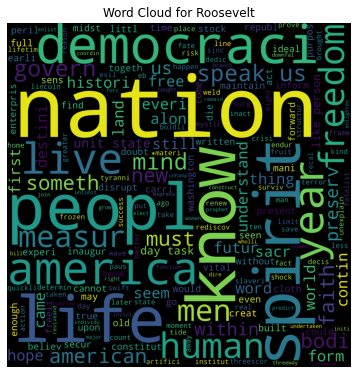

In [127]:
cloud_r = speeches_try.iloc[0][8]
wordcloud_1 = WordCloud(stopwords=stop_1,background_color = 'black',width = 2500,height = 2500,min_font_size = 10).generate(cloud_r)


##plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud_1) 
plt.axis("off")
plt.title("Word Cloud for Roosevelt")
plt.tight_layout(pad = 0) 
plt.show();

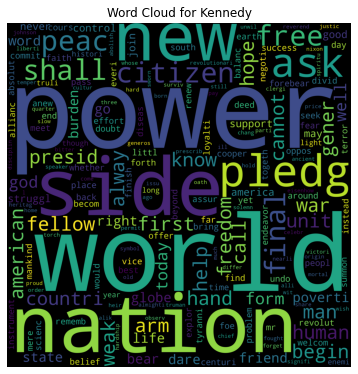

In [128]:
cloud_k = speeches_try.iloc[0][11]
wordcloud_2 = WordCloud(stopwords=stop_2,background_color = 'black',width = 2500,height = 2500,min_font_size = 10).generate(cloud_k)

##plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud_2) 
plt.axis("off")
plt.title("Word Cloud for Kennedy")
plt.tight_layout(pad = 0) 
plt.show();

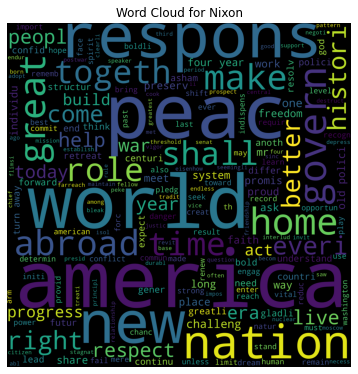

In [131]:
cloud_n = speeches_try.iloc[0][14]
wordcloud_3 = WordCloud(stopwords=stop_2,background_color = 'black',width = 2500,height = 2500,min_font_size = 10).generate(cloud_n)

##plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud_3) 
plt.axis("off")
plt.title("Word Cloud for Nixon")
plt.tight_layout(pad = 0) 
plt.show();

                                                    The End 